# SPAM CLASSIFIER

The project "SPAM CLASSIFIER", as the name suggests, classifies ham(legitimate) and spam messages provided within a dataset 
named "spam.csv" using various classification algorithms.Various classifications techniques have been applied on the same data 
and their accuracies have been compared to find out which algorithm produced best results.

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.It contains one
set of SMS messages in English of 5,572 messages, tagged according being ham (legitimate) or spam.In this project we 
build a model for classifying the SMS into spam or ham through the text of the SMS using standard classifiers.

Features in dataset:
    SMS----All english text messages
    Class---Labels whether the particular message is spam or ham(legitimate)

In [2]:
#Importing all required 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
#Reading the csv file into a dataframe
df=pd.read_csv("spam.csv",encoding="latin1")

In [4]:
#Printing first 5 columns from our data frame
df.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Observing the shape of our data frame.
df.shape
# Note: We have 2 features and 5572 data points.

(5572, 2)

# Following are ways to check missing values:

In [6]:
#Lets check for missing values
df.info()
#Observe that there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class    5572 non-null object
SMS      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


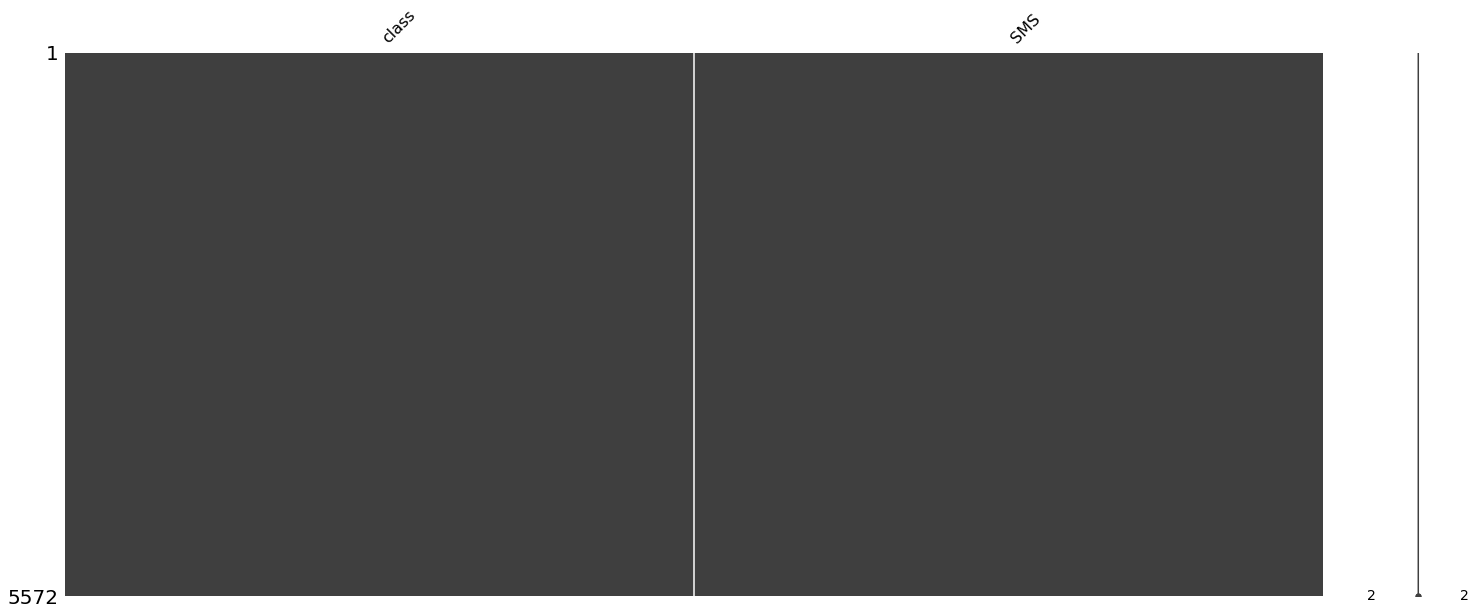

In [7]:
#Another method to check for missing values in the dataset
import missingno as msno
msno.matrix(df)
#Observe we have no white horizontal line so no missing values.

In [8]:
#Another method to check for missing values in the dataset
df.describe()
#Observe count of both features is equal to 5572.

,class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#Counting datapoints on basis of class labels.
df['class'].value_counts()
#Observe we have 4825 ham(legitimate) texts and 747 spam texts.Therefore, data is skewed.

ham     4825
spam     747
Name: class, dtype: int64

In [10]:
#Checking for duplicate values in the dataset 
df.duplicated()
#Observe we have some duplicate values represented as 'true'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5542    False
5543    False
5544    False
5545    False
5546    False
5547    False
5548    False
5549    False
5550    False
5551    False
5552    False
5553     True
5554    False
5555    False
5556    False
5557    False
5558     True
5559    False
5560    False
5561    False
5562    False
5563    False
5564    False
5565    False
5566    False
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [11]:
#Extracting all duplicate values within the dataset
dupli=df.duplicated()
type(dupli)

pandas.core.series.Series

In [12]:
#Counting number of duplicate values within the dataset
dupli.value_counts()
#Observe we have 403 duplicate entries

False    5169
True      403
dtype: int64

In [13]:
df.loc[dupli,:]

,class,SMS
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
338,ham,"Sorry, I'll call later"
356,spam,Congratulations ur awarded 500 of CD vouchers ...
443,ham,"Sorry, I'll call later"
532,ham,Gudnite....tc...practice going on
654,ham,Did u got that persons story


In [14]:
#Deleting all duplicate values and creating a new dataframe that has all unique entries 
new_df=df.drop_duplicates()
new_df.describe()

,class,SMS
count,5169,5169
unique,2,5169
top,ham,I got to video tape pple type in message lor. ...
freq,4516,1


In [15]:
#Counting number of datapoints in the new dataframe
new_df['class'].value_counts()
#Observe that new dataframe contains 4516 ham(legitimate) texts and 653 spam texts

ham     4516
spam     653
Name: class, dtype: int64

# Exploratory Data Analysis

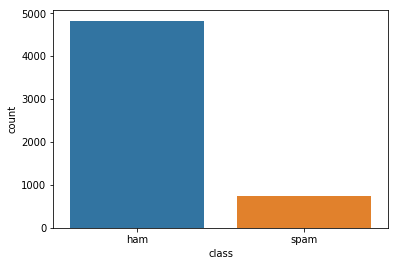

In [16]:
#Plotting number of ham and spam texts.
sns.countplot(x='class', data=df)

In [17]:
#Differentiating the data into two different dataframes according to class labels.
ham_df=df[df['class']=='ham']
spam_df=df[df['class']=='spam']
print(ham_df.shape)
print(spam_df.shape)

(4825, 2)
(747, 2)


In [18]:
#Using Count Vectoriser to count the frequency of each word in the datset after removal of stop words.
from sklearn.feature_extraction.text import CountVectorizer
ham_vect=CountVectorizer(stop_words='english')
spam_vect=CountVectorizer(stop_words='english')
ham_dtm=ham_vect.fit_transform(ham_df['SMS'])
spam_dtm=spam_vect.fit_transform(spam_df['SMS'])

In [19]:
#Extracting feature names and their frequency and then converting them into a dictionary (for ham texts)
ham_word=ham_vect.get_feature_names()
ham_freqs=ham_dtm.sum(axis=0).A1
ham_result=dict(zip(ham_word,ham_freqs))
print(len(ham_word))

6589


In [20]:
#Extracting feature names and their frequency and then converting them into a dictionary (for spam texts)
spam_word=spam_vect.get_feature_names()
spam_freqs=spam_dtm.sum(axis=0).A1
spam_result=dict(zip(spam_word,spam_freqs))
print(len(spam_word))

2699


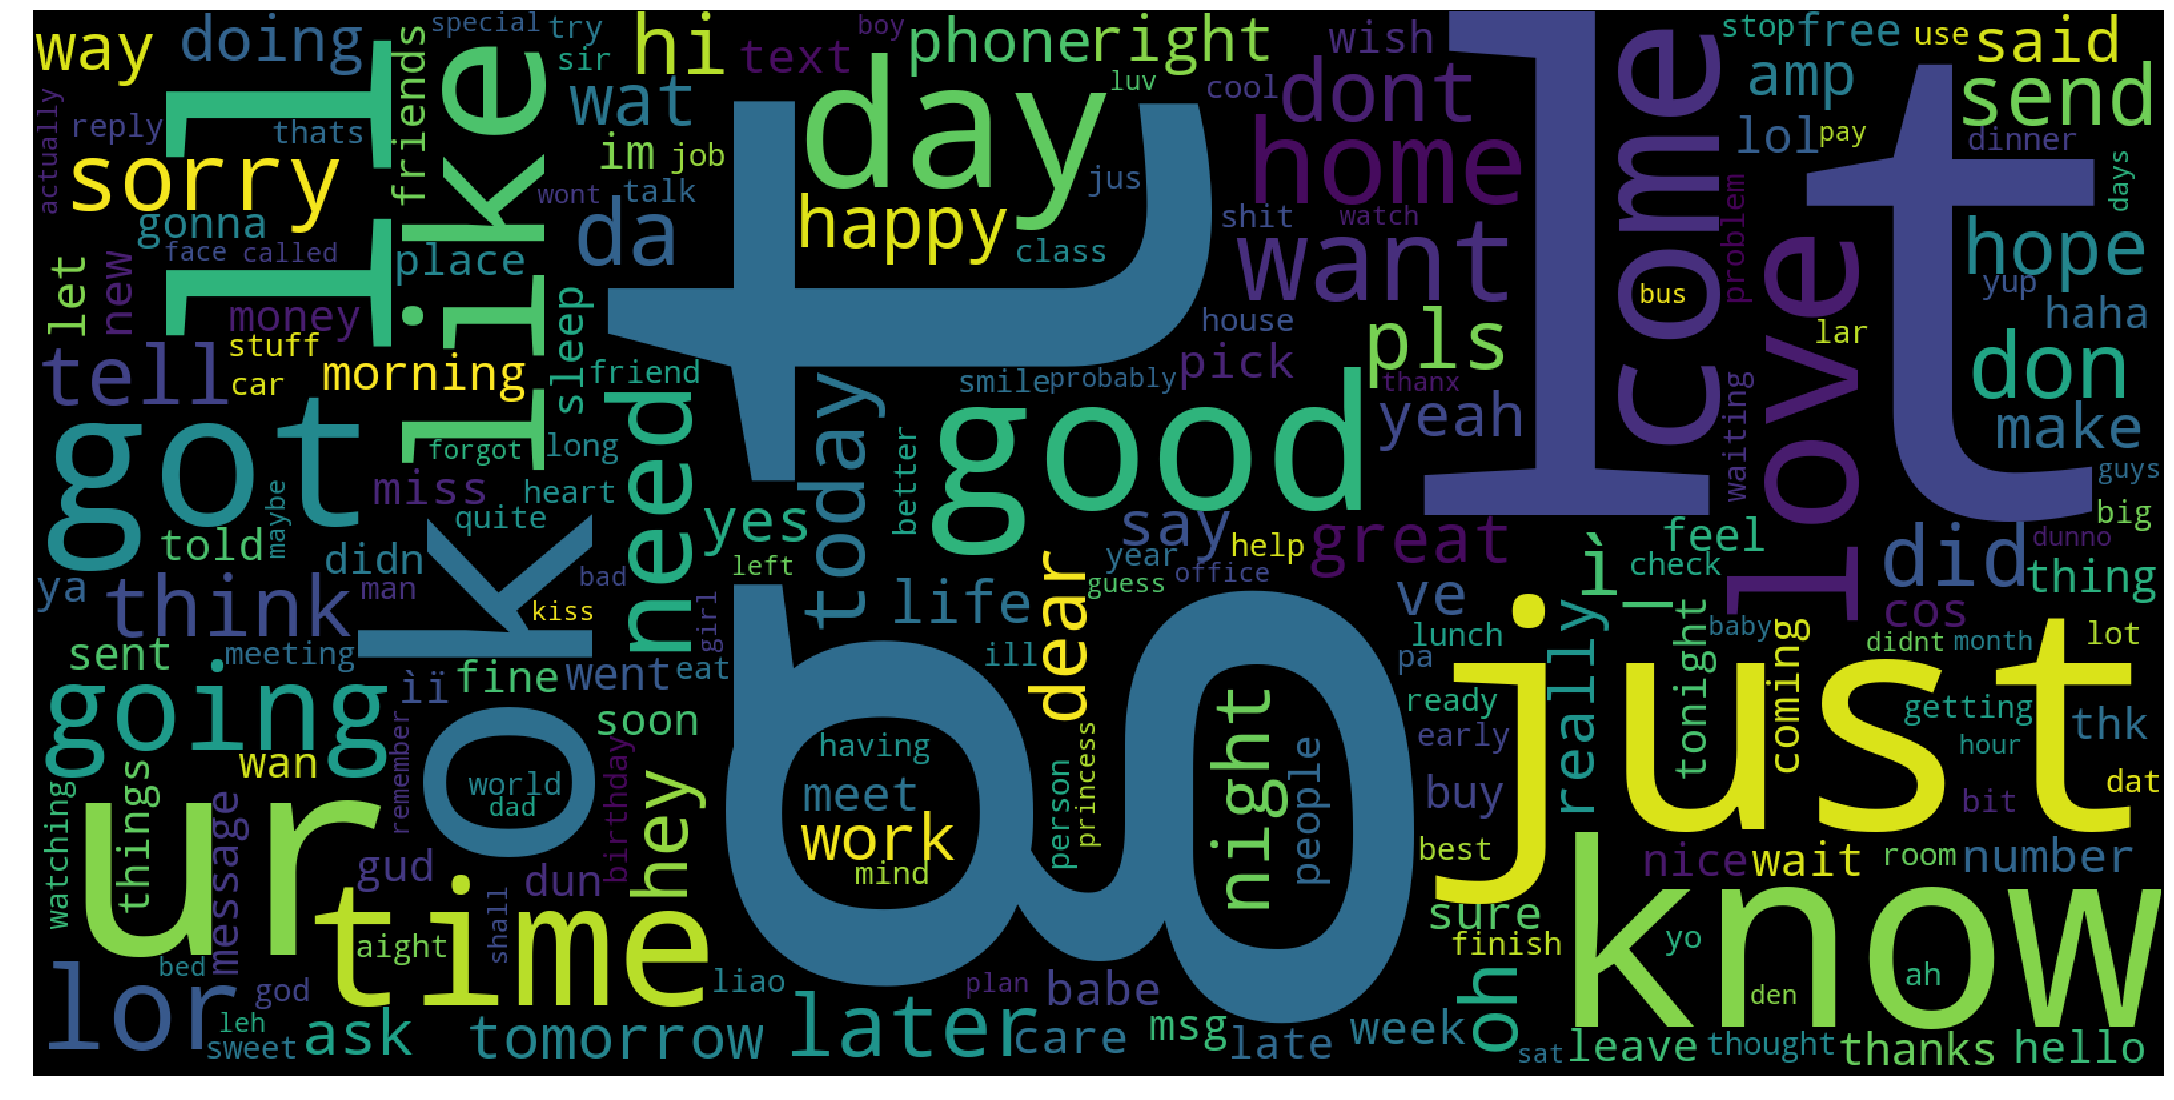

In [21]:
#printing wordcloud for the ham texts.
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='black',
                     width=1600,
                     height=800).generate_from_frequencies(ham_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("ham_wordcloud.png")
plt.show()

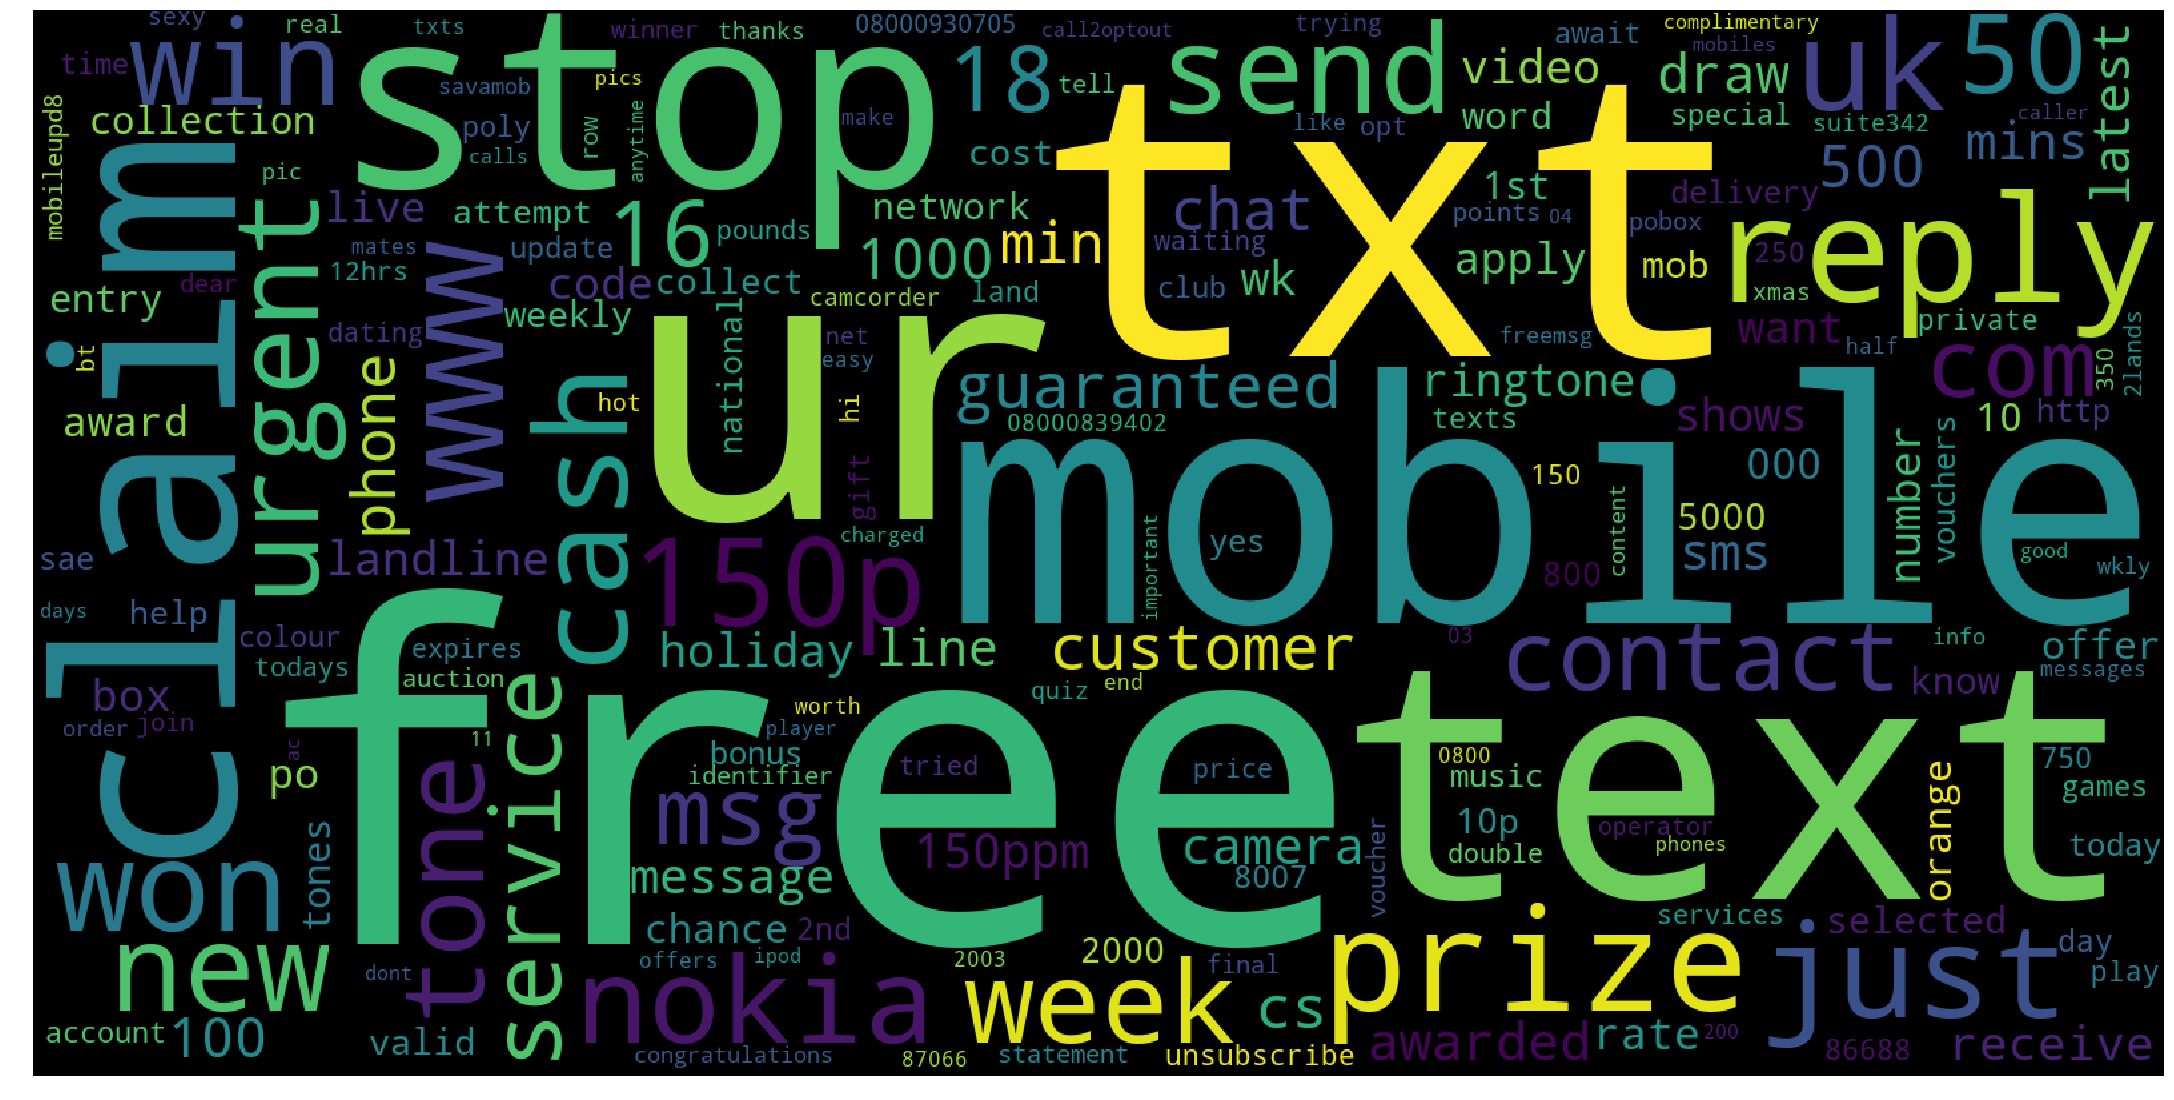

In [22]:
#printing wordcloud for the spam texts.
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(spam_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("spam_wordcloud.png")
plt.show()

In [23]:
#Calculating the average length of both legitimate and spam texts
df_2=(new_df.groupby('class')['SMS'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_text'))
print(df_2)
#Observe that length of spam texts is much more than the legitimate texts.

  class  mean_len_text
0   ham      70.459256
1  spam     137.891271


In [24]:
#Splitting the dataset into train and test parts using STRATIFIED SHUFFLE SPLIT technique.
x=new_df['SMS']
y=new_df['class']
from sklearn.model_selection import train_test_split
tts=train_test_split(x,y,train_size=0.7,random_state=6,stratify=y)
x_train,x_test,y_train,y_test=tts

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
#Using TfIdfVectoriser to vectorise the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train)
dtm_test=vectorizer_train.transform(x_test)

# Classification of Data

In the following cells we are applying various the classification algorithms to the dataset.
----Training the model using the training set(dtm_train,y_train)
----Testing the model on the test set(dtm_test)
----Printing the following for each classification algorithm:
        1.Accuracy Score
        2.Confusion Matrix
        3.Classification Report
        
1.LOGISTIC REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
tick = datetime.datetime.now()
regressor.fit(dtm_train,y_train)
tock = datetime.datetime.now()
lr_train_time = tock - tick
print( lr_train_time)

0:00:00.022034


In [74]:
tick = datetime.datetime.now()
y_pred_lr=regressor.predict(dtm_test)
tock = datetime.datetime.now()
lr_pred_time = tock - tick
print( lr_pred_time)

0:00:00.002007


In [75]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [76]:
print(accuracy_score(y_test,y_pred_lr))
#Observe accuracy 96%.

0.9606705351386202


In [77]:
print(confusion_matrix(y_test,y_pred_lr))

[[1352    3]
 [  58  138]]


In [78]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1355
       spam       0.98      0.70      0.82       196

avg / total       0.96      0.96      0.96      1551



2.KNEIGHBORS CLASSIFIER

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
tick = datetime.datetime.now()
knn.fit(dtm_train,y_train)
tock = datetime.datetime.now()
knn_train_time = tock - tick
print( knn_train_time)

0:00:00.007016


In [80]:
tick = datetime.datetime.now()
y_pred_knn=knn.predict(dtm_test)
tock = datetime.datetime.now()
knn_pred_time = tock - tick
print( knn_pred_time)

0:00:00.149221


In [81]:
print(accuracy_score(y_test,y_pred_knn))
#Observe accuracy 91%.

0.912314635718891


In [82]:
print(confusion_matrix(y_test,y_pred_knn))

[[1355    0]
 [ 136   60]]


In [83]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

        ham       0.91      1.00      0.95      1355
       spam       1.00      0.31      0.47       196

avg / total       0.92      0.91      0.89      1551



3.NAIVE BAYES' CLASSIFIER

In [84]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
tick = datetime.datetime.now()
model1.fit(dtm_train, y_train)
tock = datetime.datetime.now()
nb_train_time = tock - tick
print( nb_train_time)

0:00:00.013037


In [85]:
tick = datetime.datetime.now()
y_pred_nvm= model1.predict(dtm_test)
tock = datetime.datetime.now()
nb_pred_time = tock - tick
print( nb_pred_time)

0:00:00.001001


In [86]:
print(accuracy_score(y_test , y_pred_nvm))
#Observe accuracy 94%.

0.9484203739522888


In [87]:
print(confusion_matrix(y_test,y_pred_nvm))

[[1355    0]
 [  80  116]]


In [88]:
print(classification_report(y_test,y_pred_nvm))

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97      1355
       spam       1.00      0.59      0.74       196

avg / total       0.95      0.95      0.94      1551



4.SUPPORT VECTOR MACHINE

In [89]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
tick = datetime.datetime.now()
model1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc_train_time = tock - tick
print( svc_train_time)

0:00:00.586300


In [90]:
tick = datetime.datetime.now()
y_pred_svc=model1.predict(dtm_test)
tock = datetime.datetime.now()
svc_pred_time = tock - tick
print( svc_pred_time)

0:00:00.211871


In [91]:
print(accuracy_score(y_test,y_pred_svc))
#Observe accuracy 98%.

0.9819471308833011


In [92]:
print(confusion_matrix(y_test,y_pred_svc))

[[1352    3]
 [  25  171]]


In [93]:
print(classification_report(y_test,y_pred_svc))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1355
       spam       0.98      0.87      0.92       196

avg / total       0.98      0.98      0.98      1551



In [94]:
model2=SVC(kernel='rbf')
tick = datetime.datetime.now()
model2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc2_train_time = tock - tick
print( svc2_train_time)

0:00:00.594269


In [114]:
tick = datetime.datetime.now()
y_pred_svc2=model2.predict(dtm_test)
tock = datetime.datetime.now()
svc2_pred_time = tock - tick
print( svc2_pred_time)

0:00:00.226324


In [117]:
print(accuracy_score(y_test,y_pred_svc2))
#Observe accuracy 87%.

0.8736299161831077


In [118]:
print(confusion_matrix(y_test,y_pred_svc2))

[[1355    0]
 [ 196    0]]


In [119]:
print(classification_report(y_test,y_pred_svc2))

             precision    recall  f1-score   support

        ham       0.87      1.00      0.93      1355
       spam       0.00      0.00      0.00       196

avg / total       0.76      0.87      0.81      1551



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5.DECISION TREE CLASSIFIER

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtc_1=DecisionTreeClassifier(criterion='gini')
tick = datetime.datetime.now()
dtc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc1_train_time = tock - tick
print( dtc1_train_time)

0:00:00.213743


In [116]:
tick = datetime.datetime.now()
y_pred_dtc1=dtc_1.predict(dtm_test)
tock = datetime.datetime.now()
dtc1_pred_time = tock - tick
print( dtc1_pred_time)

0:00:00.001003


In [96]:
print(accuracy_score(y_test,y_pred_dtc1))
#Observe accuracy 95%.

0.9529335912314636


In [97]:
print(confusion_matrix(y_test,y_pred_dtc1))

[[1329   26]
 [  47  149]]


In [98]:
print(classification_report(y_test,y_pred_dtc1))

             precision    recall  f1-score   support

        ham       0.97      0.98      0.97      1355
       spam       0.85      0.76      0.80       196

avg / total       0.95      0.95      0.95      1551



In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc_2=DecisionTreeClassifier(criterion='entropy')
tick = datetime.datetime.now()
dtc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc2_train_time = tock - tick
print( dtc2_train_time)

0:00:00.284654


In [100]:
tick = datetime.datetime.now()
y_pred_dtc2=dtc_2.predict(dtm_test)
tock = datetime.datetime.now()
nb_train_time = tock - tick
print( nb_train_time)

0:00:00.001003


In [101]:
print(accuracy_score(y_test,y_pred_dtc2))
#Observe accuracy 94%.

0.9439071566731141


In [102]:
print(confusion_matrix(y_test,y_pred_dtc2))

[[1331   24]
 [  63  133]]


In [103]:
print(classification_report(y_test,y_pred_dtc2))

             precision    recall  f1-score   support

        ham       0.95      0.98      0.97      1355
       spam       0.85      0.68      0.75       196

avg / total       0.94      0.94      0.94      1551



In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(criterion='gini')
tick = datetime.datetime.now()
rfc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc1_train_time = tock - tick
print( rfc1_train_time)

0:00:00.142960


In [105]:
tick = datetime.datetime.now()
y_pred_rfc1=rfc_1.predict(dtm_test)
tock = datetime.datetime.now()
rfc1_pred_time = tock - tick
print( rfc1_pred_time)

0:00:00.009021


In [106]:
print(accuracy_score(y_test,y_pred_rfc1))
#Observe accuracy 95%.

0.9645390070921985


In [107]:
print(confusion_matrix(y_test,y_pred_rfc1))

[[1355    0]
 [  55  141]]


In [108]:
print(classification_report(y_test,y_pred_rfc1))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1355
       spam       1.00      0.72      0.84       196

avg / total       0.97      0.96      0.96      1551



In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc_2=RandomForestClassifier(criterion='entropy')
tick = datetime.datetime.now()
rfc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc2_train_time = tock - tick
print( rfc2_train_time)

0:00:00.146087


In [110]:
tick = datetime.datetime.now()
y_pred_rfc2=rfc_2.predict(dtm_test)
tock = datetime.datetime.now()
rfc2_pred_time = tock - tick
print( rfc2_pred_time)

0:00:00.009026


In [111]:
print(accuracy_score(y_test,y_pred_rfc2))
#Observe accuracy 95%.

0.9587362991618311


In [112]:
print(confusion_matrix(y_test,y_pred_rfc2))

[[1354    1]
 [  63  133]]


In [113]:
print(classification_report(y_test,y_pred_rfc2))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1355
       spam       0.99      0.68      0.81       196

avg / total       0.96      0.96      0.96      1551



# In this project total of 9 Algorithms have been Implemented optimized and analysed

# We are using several Metrics to evaluate the algorithms.

The metrics are as follows:

Accuracy

Time to train the Model

Time To Predict

Accuracy-Time Ratio( Train)

Accuracy-Time Ratio( Test)

In [120]:
import pandas as pd
import seaborn as sns

Accuracy = [0.9606705351386202, 0.912314635718891, 0.9484203739522888, 0.9819471308833011, 
           0.8736299161831077, 0.9555125725338491, 0.9471308833010961, 0.9574468085106383, 0.9516441005802708 ]  
Train_time = [00.022034,00.007016,00.013037,00.586300,00.594269,00.213743,00.284654,00.142960,00.146087]
pred_test_time = [00.002007,00.149221,00.001001,00.211871,00.226324,00.001003,00.001003,00.009021,00.009026]

data = { 'Accuracy' : Accuracy,
         'Train_Time': Train_time,
         'Prediction': pred_test_time,
         'Algorithm': ['Logistic Regression','KNeighbors',"Naive Baye's",'SVM linear','SVM rbf',"Decision Tree(gini)",
                       'Decision Tree(entropy)','Random Forest Classifier(gini)','Random Forest Classifier(entropy)']}

df = pd.DataFrame( data)


# Comparison based on Accuracy

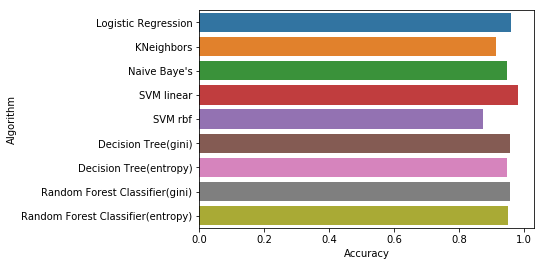

In [121]:
sns.barplot(x = df.Accuracy, y = df.Algorithm)

# Comparison based on Training set

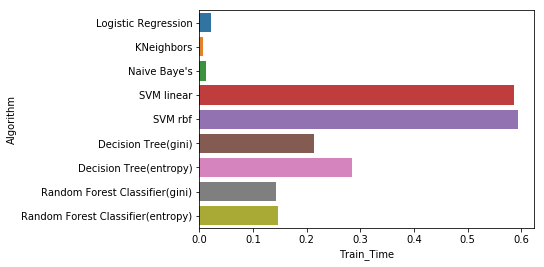

In [122]:
sns.barplot(x = df.Train_Time, y = df.Algorithm)

# Comparison based on Prediction Time

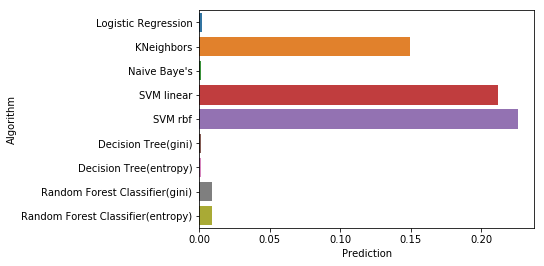

In [123]:
sns.barplot(x = df.Prediction, y = df.Algorithm)